# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_temp_kelvin = city_weather["main"]["temp_max"]
        city_max_temp = city_temp_kelvin - 273.15
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-pierre
Processing Record 2 of Set 1 | ha'il
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | vilyuchinsk
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | geraldton
Processing Record 8 of Set 1 | dudinka
Processing Record 9 of Set 1 | daru
Processing Record 10 of Set 1 | kargasok
Processing Record 11 of Set 1 | ponta delgada
Processing Record 12 of Set 1 | les avirons
Processing Record 13 of Set 1 | pisco
Processing Record 14 of Set 1 | la mira
Processing Record 15 of Set 1 | galveston
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | yuzhno-kurilsk
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | kokuy
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | kotlas
Processing Record 23

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-pierre,-21.3393,55.4781,21.98,68,0,2.57,RE,1696302137
1,ha'il,27.5219,41.6907,24.01,35,0,0.00,SA,1696302137
2,waitangi,-43.9535,-176.5597,8.23,92,100,7.60,NZ,1696302127
3,vilyuchinsk,52.9306,158.4028,9.15,85,100,3.07,RU,1696302137
4,invercargill,-46.4000,168.3500,16.68,49,6,2.68,NZ,1696302137


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-pierre,-21.3393,55.4781,21.98,68,0,2.57,RE,1696302137
1,ha'il,27.5219,41.6907,24.01,35,0,0.00,SA,1696302137
2,waitangi,-43.9535,-176.5597,8.23,92,100,7.60,NZ,1696302127
3,vilyuchinsk,52.9306,158.4028,9.15,85,100,3.07,RU,1696302137
4,invercargill,-46.4000,168.3500,16.68,49,6,2.68,NZ,1696302137


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

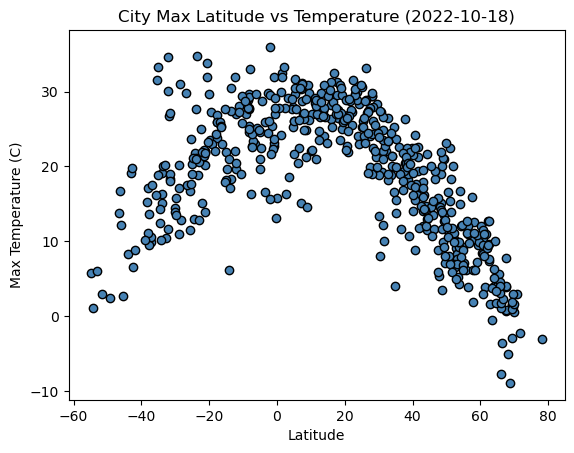

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', color="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

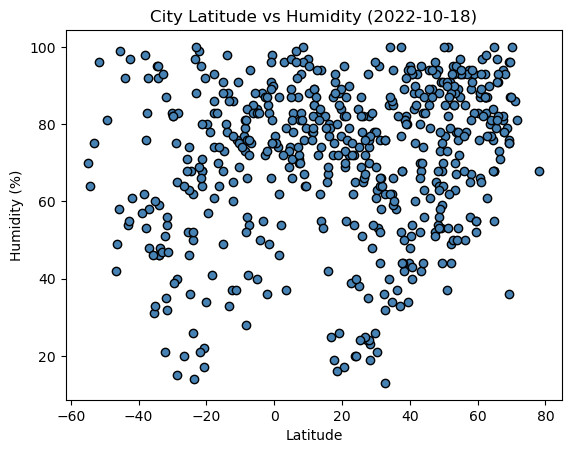

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', color="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

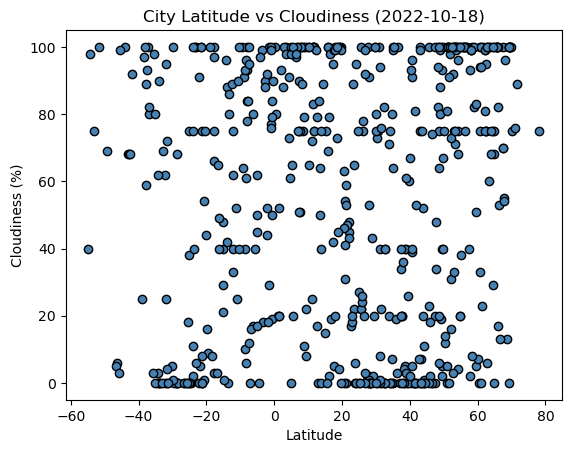

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', color="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

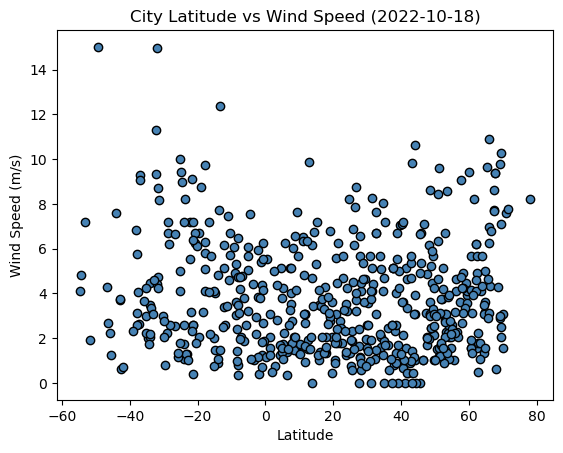

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', color="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 

#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ha'il,27.5219,41.6907,24.01,35,0,0.00,SA,1696302137
3,vilyuchinsk,52.9306,158.4028,9.15,85,100,3.07,RU,1696302137
5,longyearbyen,78.2186,15.6401,-3.09,68,75,8.23,SJ,1696302137
7,dudinka,69.4058,86.1778,1.46,96,100,10.28,RU,1696302138
9,kargasok,59.0556,80.8572,7.20,93,82,4.47,RU,1696302138


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-pierre,-21.3393,55.4781,21.98,68,0,2.57,RE,1696302137
2,waitangi,-43.9535,-176.5597,8.23,92,100,7.60,NZ,1696302127
4,invercargill,-46.4000,168.3500,16.68,49,6,2.68,NZ,1696302137
6,geraldton,-28.7667,114.6000,20.23,40,68,6.69,AU,1696302035
8,daru,-9.0763,143.2092,27.06,75,64,4.92,PG,1696302138


###  Temperature vs. Latitude Linear Regression Plot

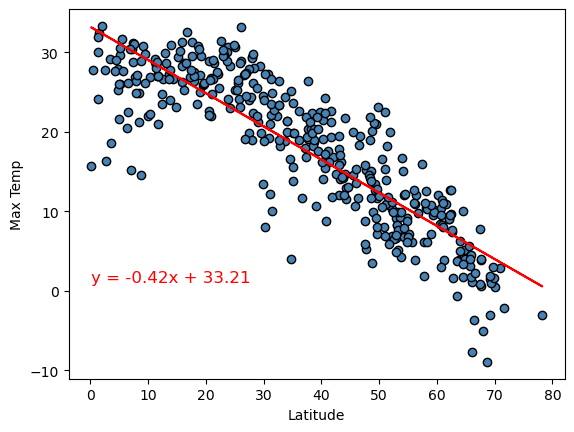

The r-value is: -0.8692967647668987


In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, color='steelblue', alpha=1, edgecolors="black")
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq, (min(x_values), min(y_values) + 10), fontsize=12, color='red')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

print(f"The r-value is: {rvalue}")

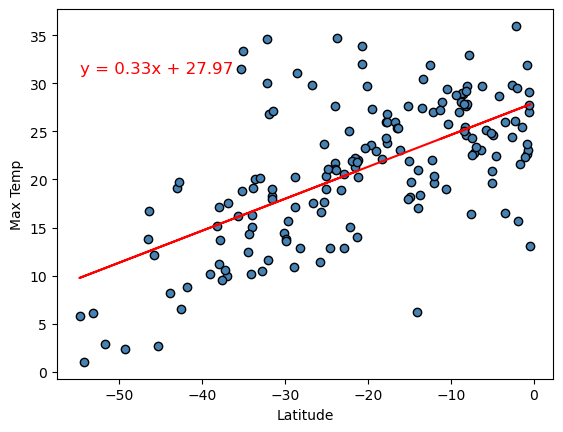

The r-value is: 0.6227091670896822


In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, color='steelblue', edgecolors="black")
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq, (min(x_values), min(y_values) + 30), fontsize=12, color='red')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** In the Northern Hemisphere, as the latitude increases, the temperature decreases signaling movement away from the equator. The opposite is true in the Southern Hemisphere whereby as the latitude increases (negative to 0), the temperature increases.

### Humidity vs. Latitude Linear Regression Plot

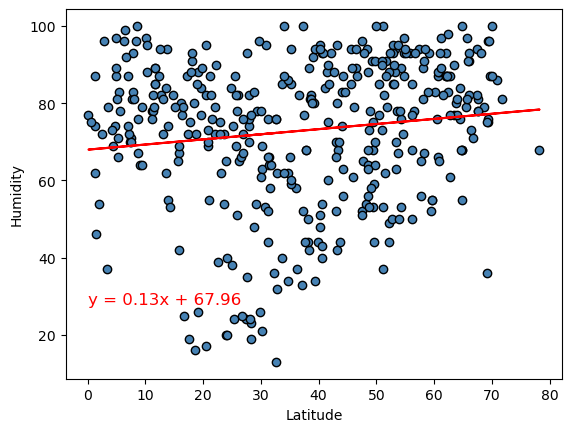

The r-value is: 0.1359681392202735


In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, color='steelblue', edgecolors="black")
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq, (min(x_values), min(y_values) + 15), fontsize=12, color='red')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print(f"The r-value is: {rvalue}")

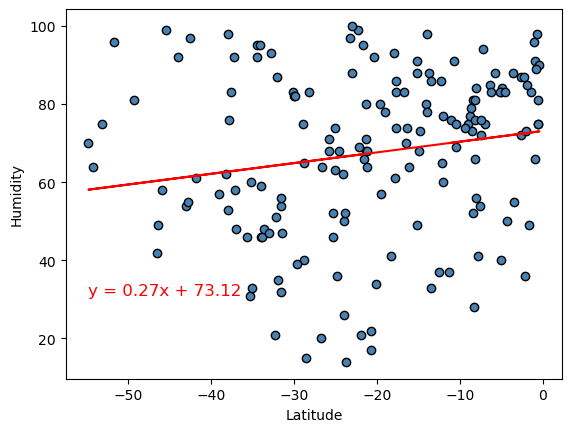

The r-value is: 0.17742425664256703


In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, color='steelblue', edgecolors="black")
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq, (min(x_values), min(y_values) + 17), fontsize=12, color='red')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** Regardless of it being the Northern or Southern hemisphere, humidity gradually increases in both parts of the world with the Northern Hemisphere 'slope' at 0.13 and the Southern Hemisphere 'slope' at 0.27.

### Cloudiness vs. Latitude Linear Regression Plot

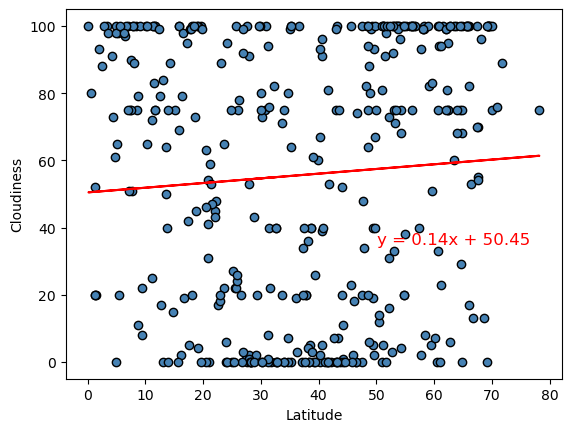

The r-value is: 0.06900358998060518


In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, color='steelblue', edgecolors="black")
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq, (min(x_values)+ 50, min(y_values) + 35), fontsize=12, color='red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

print(f"The r-value is: {rvalue}")

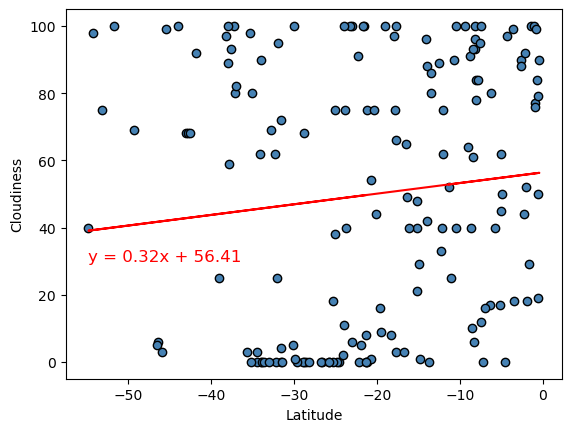

The r-value is: 0.11196248481611477


In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, color='steelblue', edgecolors="black")
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq, (min(x_values), min(y_values) + 30), fontsize=12, color='red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** Cloudiness increases with increase in latitude slightly higher in the Southern Hemisphere than in the Northern Hemisphere with slopes at 0.32 and 0.14 respectively.

### Wind Speed vs. Latitude Linear Regression Plot

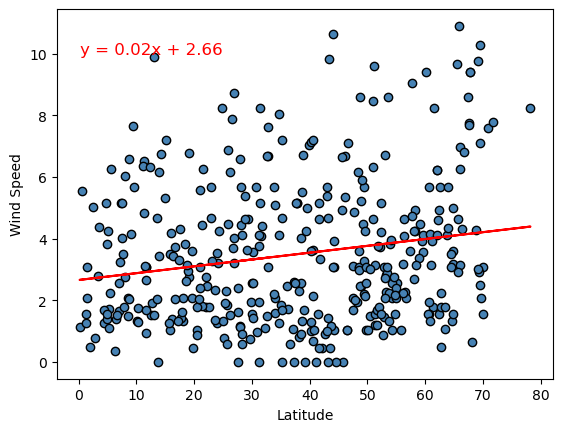

The r-value is: 0.18530627186980153


In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, color='steelblue', edgecolors="black")
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq, (min(x_values), min(y_values) + 10), fontsize=12, color='red')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

print(f"The r-value is: {rvalue}")

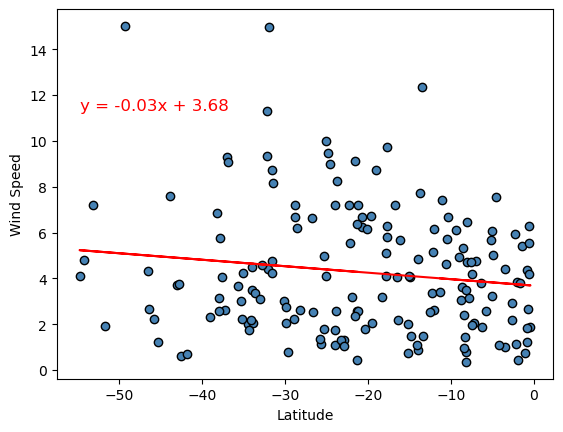

The r-value is: -0.13866170212257414


In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, color='steelblue', edgecolors="black")
plt.plot(x_values, regress_values, color='red')
plt.annotate(line_eq, (min(x_values), min(y_values) + 11), fontsize=12, color='red')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** There's an inverse relationship with the increase in latitude and wind speed. In the Northern Hemisphere, windspeed increases with increase in latitude whereas in the Southern Hemisphere, wind speed decreases with an increase in latitude in correlation with the global currents.